# Video Preprocessing – Frame Extraction & Resolution Normalization

**Goal:**  
Convert raw football match video into a standardized sequence of frames with:
- Fixed FPS
- Fixed resolution  
This prepares the data for player, ball, and referee detection.

**Output:**  
A folder of normalized image frames ready for computer vision models.


In [1]:
import cv2
import os
import matplotlib.pyplot as plt

VIDEO_PATH = "../data/raw_videos/match.mkv"
OUTPUT_DIR = "../data/frames"

TARGET_WIDTH = 1280
TARGET_HEIGHT = 720
TARGET_FPS = 5


Error: Reached 5-minute limit


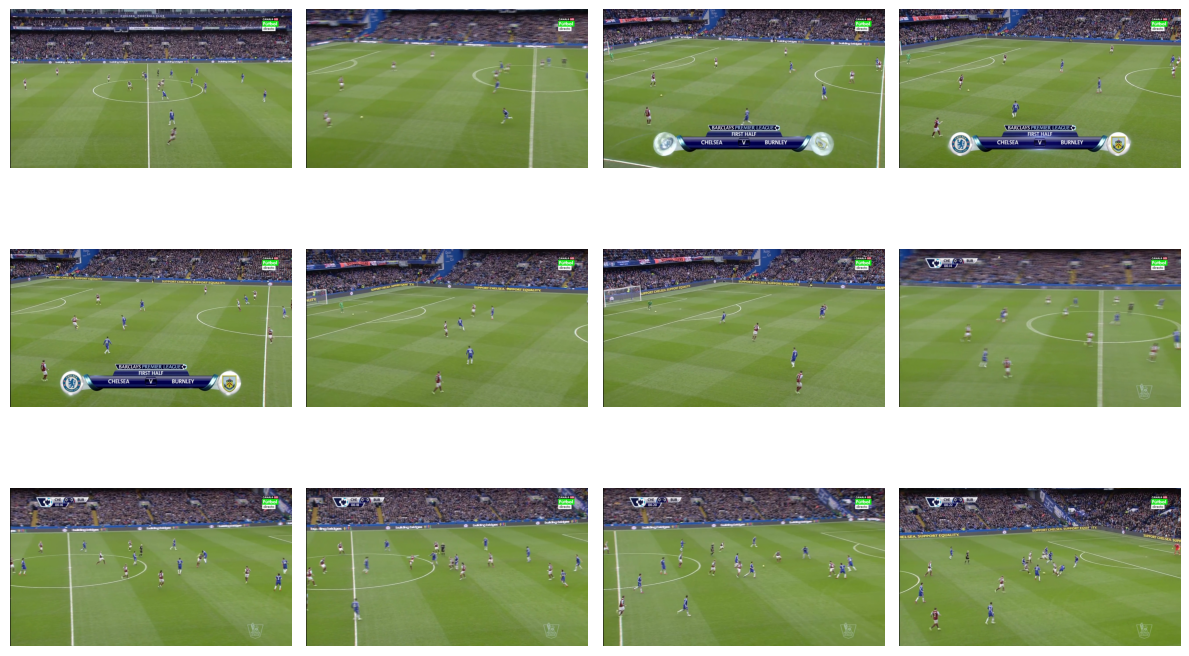

Success: saved 1500 frames from first 5 minutes


In [2]:
# -------- SAFETY CONFIG --------
MAX_MINUTES = 5
DISPLAY_EVERY_N = 10   # show every 10th saved frame in notebook
# -------------------------------
os.makedirs(OUTPUT_DIR, exist_ok=True)

cap = cv2.VideoCapture(VIDEO_PATH)

original_fps = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(original_fps // TARGET_FPS)

max_frames = int(original_fps * 60 * MAX_MINUTES)

frame_count = 0
saved_count = 0
display_count = 0

plt.figure(figsize=(12, 8))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count >= max_frames:
        print("Error: Reached 5-minute limit")
        break

    if frame_count % frame_interval == 0:
        resized = cv2.resize(
            frame,
            (TARGET_WIDTH, TARGET_HEIGHT),
            interpolation=cv2.INTER_LINEAR
        )

        filename = f"frame_{saved_count:06d}.jpg"
        cv2.imwrite(os.path.join(OUTPUT_DIR, filename), resized)

        # ---- Display in notebook ----
        if saved_count % DISPLAY_EVERY_N == 0 and display_count < 12:
            rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 4, display_count + 1)
            plt.imshow(rgb)
            plt.axis("off")
            display_count += 1

        saved_count += 1

    frame_count += 1

cap.release()
plt.tight_layout()
plt.show()

print(f"Success: saved {saved_count} frames from first {MAX_MINUTES} minutes")